In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from geopy.distance import geodesic
import folium
import math

In [5]:
# Foi feita a média de 10 coletas estáticas no centro de rotação do pivô com o esp32 e ficou um pouco diferente do artigo. 
# Usarei a medida do coletada, pois ao plotar no folium, é dada uma coordenada errada.
# lat_medida = -22,7134209
# long_medida = -47,6284572

# lat_artigo = -22.7132778 --- > 22°42’47.8” S
# long_artigo = -47.6291389 ---> 47°37’44.9” W

# Coordenadas para posicionar o mapa do folium no pivô
pivot_lat = -22.7134209
pivot_long = -47.6284572

# Pontos Referência Pivô

In [6]:
# Dados do novo centro
radius_m = 10.23  # raio do círculo em metros
num_points = 720

# Constantes de conversão
meters_per_degree_lat = 111320  # metros por grau latitude
meters_per_degree_lon = meters_per_degree_lat * math.cos(math.radians(pivot_lat))  # metros por grau longitude ajustado

# Lista para armazenar os pontos do novo círculo
circle_points_pivot = []

for i in range(num_points):
    angle_deg = i * (360/num_points)
    angle_rad = math.radians(angle_deg)

    delta_lat = (radius_m * math.cos(angle_rad)) / meters_per_degree_lat
    delta_lon = (radius_m * math.sin(angle_rad)) / meters_per_degree_lon

    new_lat = pivot_lat + delta_lat
    new_lon = pivot_long + delta_lon

    circle_points_pivot.append({"latitude": new_lat, "longitude": new_lon, "angle_deg": angle_deg})

# Criar DataFrame e salvar como CSV
df_pivot_circle = pd.DataFrame(circle_points_pivot)
df_pivot_circle.to_csv("Dados/pontos_referencia_pivo.csv", index=False)

In [7]:
# Carregando as coordenadas projetadas no utilizando o centro do pivo
df_pivot = pd.read_csv('Dados/pontos_referencia_pivo.csv')
df_pivot

,latitude,longitude,angle_deg
0,-22.713329,-47.628457,0.0
1,-22.713329,-47.628456,0.5
2,-22.713329,-47.628455,1.0
3,-22.713329,-47.628455,1.5
4,-22.713329,-47.628454,2.0
...,...,...,...
715,-22.713329,-47.628462,357.5
716,-22.713329,-47.628461,358.0
717,-22.713329,-47.628460,358.5
718,-22.713329,-47.628459,359.0


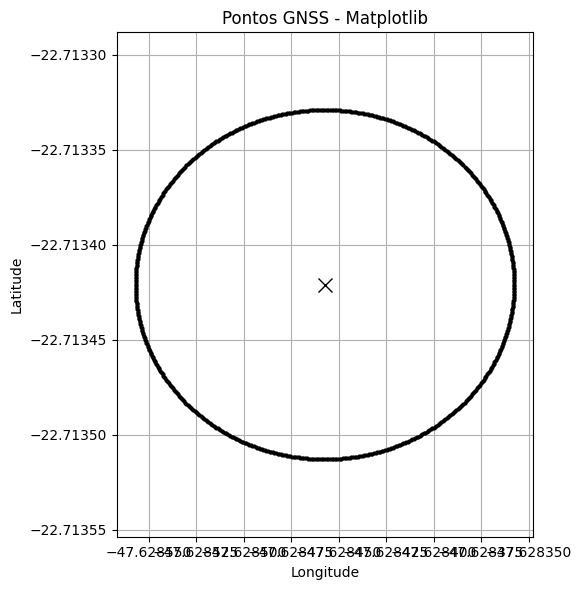

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(df_pivot["longitude"], df_pivot["latitude"], marker='o', linestyle="", markersize=2, color='black')
ax.plot(pivot_long, pivot_lat, marker='x', color='black', markersize=10, label='Ponto de Pivô')
ax.set_title("Pontos GNSS - Matplotlib")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
ax.axis("equal")  # Mantém proporção correta
ax.ticklabel_format(useOffset=False)  # <--- ESSA LINHA REMOVE O OFFSET

plt.tight_layout()
plt.show()


In [9]:
# Adiciona os pontos como marcadores circulares
# Criar o mapa centralizado na sua coordenada
map_reference = folium.Map(location=[pivot_lat, pivot_long], zoom_start=14)

for _, row in df_pivot.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="black",
        fill=True,
        fill_opacity=0.7,
        popup=f'Ângulo: {row["angle_deg"]}°'
    ).add_to(map_reference)

folium.CircleMarker(
    location=[pivot_lat, pivot_long],
    radius=2,
    color="black",
    fill=True,
    fill_opacity=0.7,
    popup=f'Ângulo: {row["angle_deg"]}°'
).add_to(map_reference)

# Salva o mapa em HTML
map_reference.save("mapa_pivo_referencia.html")

# Ensaios Realizados

Os ensaios estão organizados da seguinte forma:

- ❌ Volta 1: 12,5 Hz (o esp32 não coletou por conta de problemas na rede de energia, nos proximos foi usado um powerbank)   --> 23/04/25 11:28 até 12:38
- ✅ Volta 2: 12,5 Hz (todos os equipamentos coletaram)   --> 23/04/25 15:51 até 17:01
- ❌ Volta 3: 12,5 Hz (o app SW Maps não coletou)         --> 24/04/25 14:55 até 16:05
- ✅ Volta 4: 25 Hz (todos os equipamentos coletaram)     --> 25/04/25 9:20 até 10:30
- ✅ Volta 5: 25 Hz (todos os equipamentos coletaram)     --> 25/04/25 10:50 até 12:00


- ✅ Volta 6: 25 Hz (todos os equipamentos coletaram)     --> 25/04/25 12:25 até 13:35
- ✅ Volta 7: 12,5 Hz (todos os equipamentos coletaram)   --> 25/04/25 13:58 até 15:08
- ✅ Volta 8: 12,5 Hz (todos os equipamentos coletaram)   --> 25/04/25 15:50 até 17:00

12,5 Hz no inversor corresponde a 2,5 m/s
25 Hz no inversor corresponde a 5 m/s

Foram feitas coletas pontuais antes da volta 4, contudo o método utilizado para coleta foi de 1:10h de coleta e 20m de pausa para dar tempo de mudar a constelação dos satélites. A volta 2 irá compor a volta faltante para a situação de 12,5 HZ.

Os dados foram coletados a cada 5 segundos (0,2Hz).

In [10]:
'''
Como houveram ensaios que nem todos os dispositivos conseguiram coletar, vou organizar da seguinte forma:

 - lap_1 = Volta 4
 - lap_2 = Volta 5
 - lap_3 = Volta 6
 - lap_4 = Volta 7
 - lap_5 = Volta 8
 - lap_6 = Volta 2

'''

laps = {
    "lap_1": {
        "lap_start": "2025-04-25 09:20",
        "lap_end": "2025-04-25 10:30",
    },
    "lap_2": {
        "lap_start": "2025-04-25 10:50",
        "lap_end": "2025-04-25 12:00",
    },
    "lap_3": {
        "lap_start": "2025-04-25 12:25",
        "lap_end": "2025-04-25 13:35",
    },
    "lap_4": {
        "lap_start": "2025-04-25 13:58",
        "lap_end": "2025-04-25 15:08",
    },
    "lap_5": {
        "lap_start": "2025-04-25 15:50",
        "lap_end": "2025-04-25 17:00",
    },
    "lap_6": {
        "lap_start": "2025-04-23 15:51",
        "lap_end": "2025-04-23 17:01",
    },
}

## ESP32

In [11]:

df_esp_250_1 = pd.read_csv('Dados/esp32_volta_4.csv') # 25Hz inversor = 2,5ms - lap_1
df_esp_250_2 = pd.read_csv('Dados/esp32_volta_5.csv') # 25Hz inversor = 2,5ms - lap_2
df_esp_250_3 = pd.read_csv('Dados/esp32_volta_6.csv') # 25Hz inversor = 2,5ms - lap_3

df_esp_125_1 = pd.read_csv('Dados/esp32_volta_7.csv') # 12,5Hz inversor = 2,5ms - lap_4
df_esp_125_2 = pd.read_csv('Dados/esp32_volta_8.csv') # 12,5Hz inversor = 2,5ms - lap_5
df_esp_125_3 = pd.read_csv('Dados/esp32_volta_2.csv') # 12,5Hz inversor = 2,5ms - lap_6


laps["lap_1"]["data_esp"] = df_esp_250_1
laps["lap_2"]["data_esp"] = df_esp_250_2
laps["lap_3"]["data_esp"] = df_esp_250_3
laps["lap_4"]["data_esp"] = df_esp_125_1
laps["lap_5"]["data_esp"] = df_esp_125_2
laps["lap_6"]["data_esp"] = df_esp_125_3

laps["lap_6"]["data_esp"]


,2025-04-23 15:54:15,2025-4-23 18:54:15,-22.713407,-47.628441,543.300000,0.87,10
0,2025-04-23 15:54:17,2025-4-23 18:54:16,-22.713423,-47.628442,543.2,0.87,10
1,2025-04-23 15:54:18,2025-4-23 18:54:17,-22.713440,-47.628447,543.1,0.87,10
2,2025-04-23 15:54:19,2025-4-23 18:54:19,-22.713468,-47.628464,543.1,0.87,10
3,2025-04-23 15:54:20,2025-4-23 18:54:20,-22.713479,-47.628477,543.4,0.87,10
4,2025-04-23 15:54:21,2025-4-23 18:54:21,-22.713489,-47.628491,543.4,0.87,10
...,...,...,...,...,...,...,...
3292,2025-04-23 16:54:10,2025-4-23 19:54:10,-22.713385,-47.628626,546.8,1.18,9
3293,2025-04-23 16:54:11,2025-4-23 19:54:11,-22.713372,-47.628616,546.9,0.93,10
3294,2025-04-23 16:54:12,2025-4-23 19:54:12,-22.713360,-47.628603,547.0,0.93,10
3295,2025-04-23 16:54:13,2025-4-23 19:54:13,-22.713351,-47.628588,546.9,0.93,10


In [12]:
# Percorrendo as chaves do dicionário, estou renomeando as colunas, cortando os dados capturados fora do range de lap_start e lap_end e
# diminuindo a frequência de coleta, pois o esp32 eu configurei para coletar a cada 1 seg e selecionei dados a cada 5 seg

for lap_name, lap_data in laps.items():
    if "data_esp" in lap_data:
        dataframe = lap_data["data_esp"]

        # Renomeia as colunas
        dataframe.columns = ['timestamp_net', 'timestamp_gps', 'latitude', 'longitude', 'altitude', 'hdop', 'satélites']
        
        # Converte a coluna 'timestamp_net' para datetime
        dataframe['timestamp_net'] = pd.to_datetime(dataframe['timestamp_net'])
        
        # Usa o lap_start e lap_end da volta como timestamps
        start_time = pd.Timestamp(lap_data["lap_start"])
        end_time = pd.Timestamp(lap_data["lap_end"])
        
        # Filtra os dados dentro do intervalo de tempo da volta
        dataframe = dataframe[
            (dataframe['timestamp_net'] >= start_time) &
            (dataframe['timestamp_net'] <= end_time)
        ]
        
        # Ordena por timestamp e reseta o índice
        dataframe = dataframe.sort_values('timestamp_net').reset_index(drop=True)
        
        # Seleciona linhas com múltiplos de 5 segundos exatos a partir do start_time
        dataframe = dataframe[
            ((dataframe['timestamp_net'] - start_time).dt.total_seconds() % 5 == 0)]
        
        # Atualiza o dataframe tratado no dicionário
        laps[lap_name]["data_esp"] = dataframe


In [13]:
laps["lap_1"]["data_esp"]

,timestamp_net,timestamp_gps,latitude,longitude,altitude,hdop,satélites
0,2025-04-25 09:20:00,2025-4-25 12:20:0,-22.713417,-47.628482,547.9,1.29,9
5,2025-04-25 09:20:05,2025-4-25 12:20:5,-22.713447,-47.628639,547.4,1.29,9
9,2025-04-25 09:20:10,2025-4-25 12:20:10,-22.713302,-47.628628,547.6,1.14,10
14,2025-04-25 09:20:15,2025-4-25 12:20:15,-22.713350,-47.628475,548.7,1.14,10
19,2025-04-25 09:20:20,2025-4-25 12:20:20,-22.713468,-47.628569,547.8,1.14,10
...,...,...,...,...,...,...,...
3844,2025-04-25 10:29:40,2025-4-25 13:29:40,-22.713343,-47.628670,547.7,0.95,9
3848,2025-04-25 10:29:45,2025-4-25 13:29:45,-22.713341,-47.628670,547.4,0.95,9
3853,2025-04-25 10:29:50,2025-4-25 13:29:50,-22.713341,-47.628670,547.4,0.95,9
3857,2025-04-25 10:29:55,2025-4-25 13:29:55,-22.713342,-47.628669,547.5,0.95,9


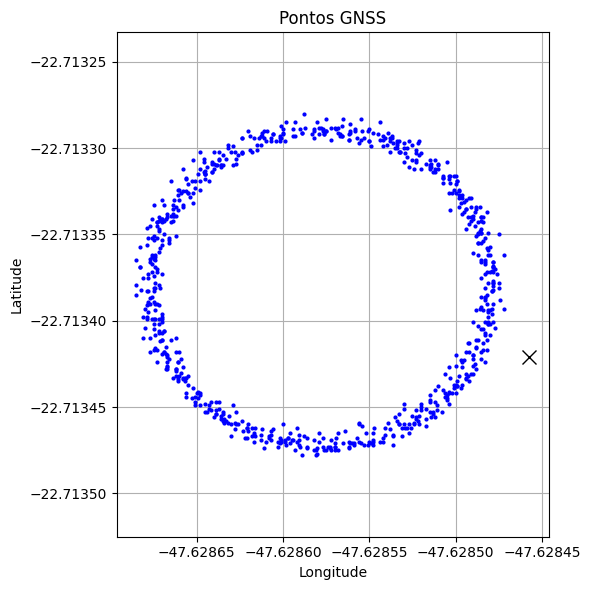

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot( laps['lap_1']["data_esp"]["longitude"], laps['lap_1']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='blue')
ax.plot(pivot_long, pivot_lat, marker='x', color='black', markersize=10, label='Ponto de Pivô')
ax.set_title("Pontos GNSS")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
ax.axis("equal")  # Mantém proporção correta
ax.ticklabel_format(useOffset=False)  # <--- ESSA LINHA REMOVE O OFFSET

plt.tight_layout()
plt.show()


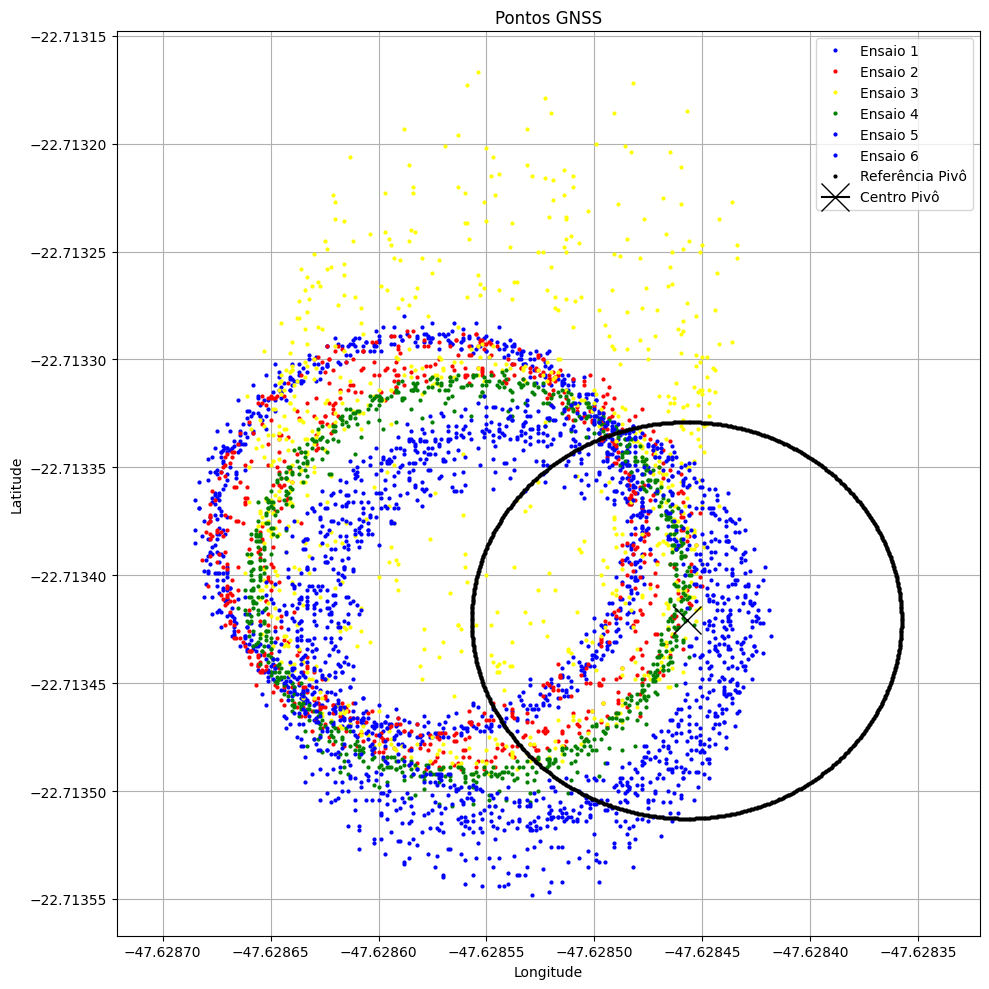

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot( laps['lap_1']["data_esp"]["longitude"], laps['lap_1']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='blue', label="Ensaio 1")
ax.plot( laps['lap_2']["data_esp"]["longitude"], laps['lap_2']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='red', label="Ensaio 2")
ax.plot( laps['lap_3']["data_esp"]["longitude"], laps['lap_3']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='yellow', label="Ensaio 3")
ax.plot( laps['lap_4']["data_esp"]["longitude"], laps['lap_4']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='green', label="Ensaio 4")
ax.plot( laps['lap_5']["data_esp"]["longitude"], laps['lap_5']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='blue', label="Ensaio 5")
ax.plot( laps['lap_6']["data_esp"]["longitude"], laps['lap_6']["data_esp"]["latitude"], marker='o', linestyle="", markersize=2, color='blue', label="Ensaio 6")
ax.plot(df_pivot["longitude"], df_pivot["latitude"], marker='o', linestyle="", markersize=2, color='black', label="Referência Pivô")
ax.plot(pivot_long, pivot_lat, marker='x', color='black', markersize=20, label="Centro Pivô")

ax.legend()

ax.set_title("Pontos GNSS")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
ax.axis("equal")  # Mantém proporção correta
ax.ticklabel_format(useOffset=False)  # <--- ESSA LINHA REMOVE O OFFSET

plt.tight_layout()
plt.show()

In [29]:

# Primeiro, criar o mapa centralizado no seu pivô
map_esp32 = folium.Map(location=[pivot_lat, pivot_long], zoom_start=17, tiles="OpenStreetMap")

# Definindo as voltas, cores e nomes
laps_to_plot = ['lap_1', 'lap_2', 'lap_3', 'lap_4', 'lap_5', 'lap_6']
colors = ['blue', 'red', 'yellow', 'green', 'purple', 'orange']
labels = ['Ensaio 1', 'Ensaio 2', 'Ensaio 3', 'Ensaio 4', 'Ensaio 5', 'Ensaio 6']

# Adiciona os pontos de cada volta
for lap_name, color, label in zip(laps_to_plot, colors, labels):
    for _, row in laps[lap_name]["data_esp"].iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"{label}"
        ).add_to(map_esp32)

# Adiciona os pontos de referência do pivô
for _, row in df_pivot.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        popup="Referência Pivô"
    ).add_to(map_esp32)

# Adiciona o centro do pivô
folium.Marker(
    location=[pivot_lat, pivot_long],
    icon=folium.Icon(color='black', icon='star'),
    popup="Centro Pivô"
).add_to(map_esp32)

# Salva o mapa
map_esp32.save("mapa_esp32.html")

### Erro Mínima Distância Geodésica

Esse método de cálculo de erro analisa a menor distância geodésica de cada ponto para o ponto mais próximo da referência do pivô

In [17]:
for lap_name in laps.keys():
    # Pega o dataframe do ensaio
    lap = laps[lap_name]['data_esp']

    erros_metros = []

    for _, ponto_lap in lap.iterrows():
        ponto_ensaio = (ponto_lap['latitude'], ponto_lap['longitude'])

        # Calcula a distância para todos os pontos de referência
        distancias = [
            geodesic(ponto_ensaio, (row['latitude'], row['longitude'])).meters
            for _, row in df_pivot.iterrows()
        ]

        # Pega a menor distância
        erro_minimo = min(distancias)
        erros_metros.append(erro_minimo)

    # Calcula estatísticas
    media_erro = np.mean(erros_metros)
    desvio_erro = np.std(erros_metros)
    max_erro = np.max(erros_metros)
    min_erro = np.min(erros_metros)
    dois_sigma = 2 * desvio_erro

    # Salva dentro do próprio dicionário laps
    laps[lap_name]['erro_analysis'] = {
        'media_erro_m': media_erro,
        'desvio_erro_m': desvio_erro,
        '2sigma_m': dois_sigma,
        'max_erro_m': max_erro,
        'min_erro_m': min_erro,
        'qtd_pontos': len(erros_metros),
        'erros_metros': erros_metros  # erros ponto a ponto
    }

# Mostra resumo geral
for lap_name in laps.keys():
    res = laps[lap_name]['erro_analysis']
    print(f"\n{lap_name}:")
    print(f"  ➔ Erro médio: {res['media_erro_m']:.2f} m")
    print(f"  ➔ Desvio padrão: {res['desvio_erro_m']:.2f} m")
    print(f"  ➔ 2σ: {res['2sigma_m']:.2f} m")
    print(f"  ➔ Erro máximo: {res['max_erro_m']:.2f} m")
    print(f"  ➔ Erro mínimo: {res['min_erro_m']:.2f} m")
    print(f"  ➔ Quantidade de pontos: {res['qtd_pontos']}")



lap_1:
  ➔ Erro médio: 7.33 m
  ➔ Desvio padrão: 4.15 m
  ➔ 2σ: 8.30 m
  ➔ Erro máximo: 14.18 m
  ➔ Erro mínimo: 0.05 m
  ➔ Quantidade de pontos: 778

lap_2:
  ➔ Erro médio: 6.73 m
  ➔ Desvio padrão: 3.69 m
  ➔ 2σ: 7.37 m
  ➔ Erro máximo: 13.31 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 767

lap_3:
  ➔ Erro médio: 7.14 m
  ➔ Desvio padrão: 4.22 m
  ➔ 2σ: 8.45 m
  ➔ Erro máximo: 19.64 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 819

lap_4:
  ➔ Erro médio: 6.25 m
  ➔ Desvio padrão: 3.21 m
  ➔ 2σ: 6.41 m
  ➔ Erro máximo: 11.12 m
  ➔ Erro mínimo: 0.03 m
  ➔ Quantidade de pontos: 817

lap_5:
  ➔ Erro médio: 5.22 m
  ➔ Desvio padrão: 2.73 m
  ➔ 2σ: 5.46 m
  ➔ Erro máximo: 10.34 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 819

lap_6:
  ➔ Erro médio: 4.62 m
  ➔ Desvio padrão: 2.41 m
  ➔ 2σ: 4.82 m
  ➔ Erro máximo: 9.17 m
  ➔ Erro mínimo: 0.03 m
  ➔ Quantidade de pontos: 650


In [24]:
dados_erro = []

i = 0 
for lap_name in laps.keys():
    # Acessa as métricas de erro dentro de laps[lap_name]['erro_analysis']
    erro_analysis = laps[lap_name]['erro_analysis']
    
    dados_erro.append({
        'Lap': labels[i],
        'Erro Médio (m)': erro_analysis['media_erro_m'],
        'Desvio Padrão (m)': erro_analysis['desvio_erro_m'],
        '2σ (m)': erro_analysis['2sigma_m'],
        'Erro Máximo (m)': erro_analysis['max_erro_m'],
        'Erro Mínimo (m)': erro_analysis['min_erro_m'],
        'Quantidade de Pontos': erro_analysis['qtd_pontos']
    })

    i +=1

# Cria o DataFrame
df_erro_esp32 = pd.DataFrame(dados_erro)

df_erro_esp32

,Lap,Erro Médio (m),Desvio Padrão (m),2σ (m),Erro Máximo (m),Erro Mínimo (m),Quantidade de Pontos
0,Ensaio 1,7.328803,4.152048,8.304097,14.176070,0.053009,778
1,Ensaio 2,6.734934,3.687433,7.374867,13.305490,0.015525,767
2,Ensaio 3,7.142252,4.223847,8.447694,19.640681,0.024764,819
3,Ensaio 4,6.249873,3.205066,6.410133,11.124062,0.033668,817
4,Ensaio 5,5.221031,2.731143,5.462286,10.335323,0.023269,819
5,Ensaio 6,4.618108,2.409425,4.818849,9.174511,0.033053,650


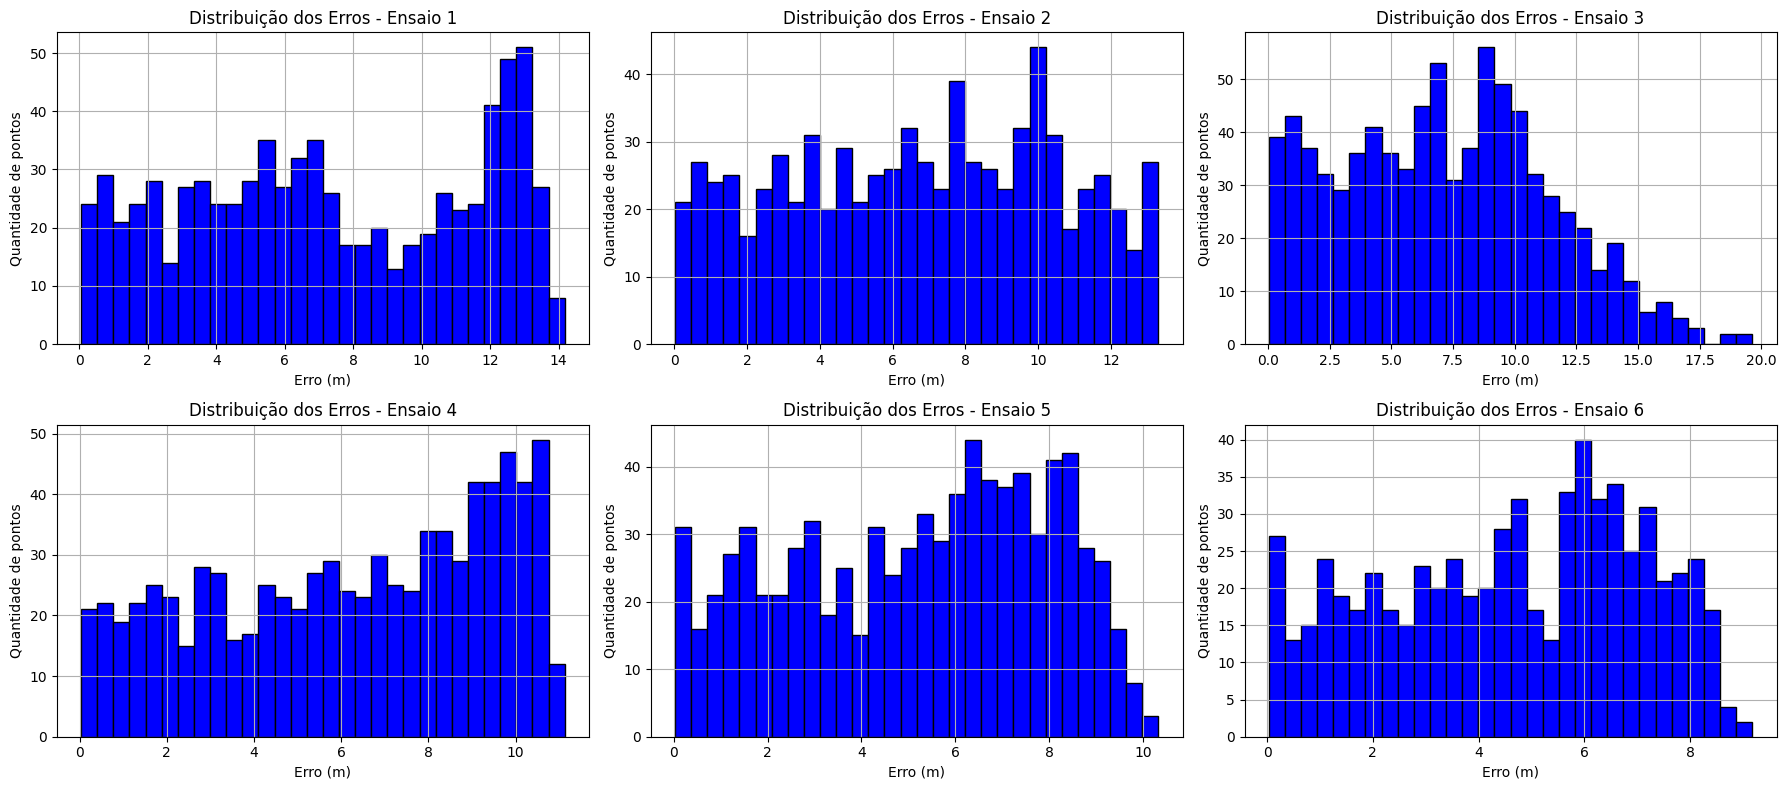

In [ ]:
# Vamos criar uma figura grande para 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()


# Para cada ensaio (lap) presente em laps
for i, lap_name in enumerate(laps.keys()):
    erros = laps[lap_name]['erro_analysis']['erros_metros']  # Erros individuais já calculados para cada lap

    # Cria o histograma para cada lap
    axs[i].hist(erros, bins=30, color='blue', edgecolor='black')
    axs[i].set_title(f'Distribuição dos Erros - {labels[i]}')
    axs[i].set_xlabel('Erro (m)')
    axs[i].set_ylabel('Quantidade de pontos')
    axs[i].grid(True)

# Ajusta o layout para não sobrepor os elementos
plt.tight_layout()
plt.show()


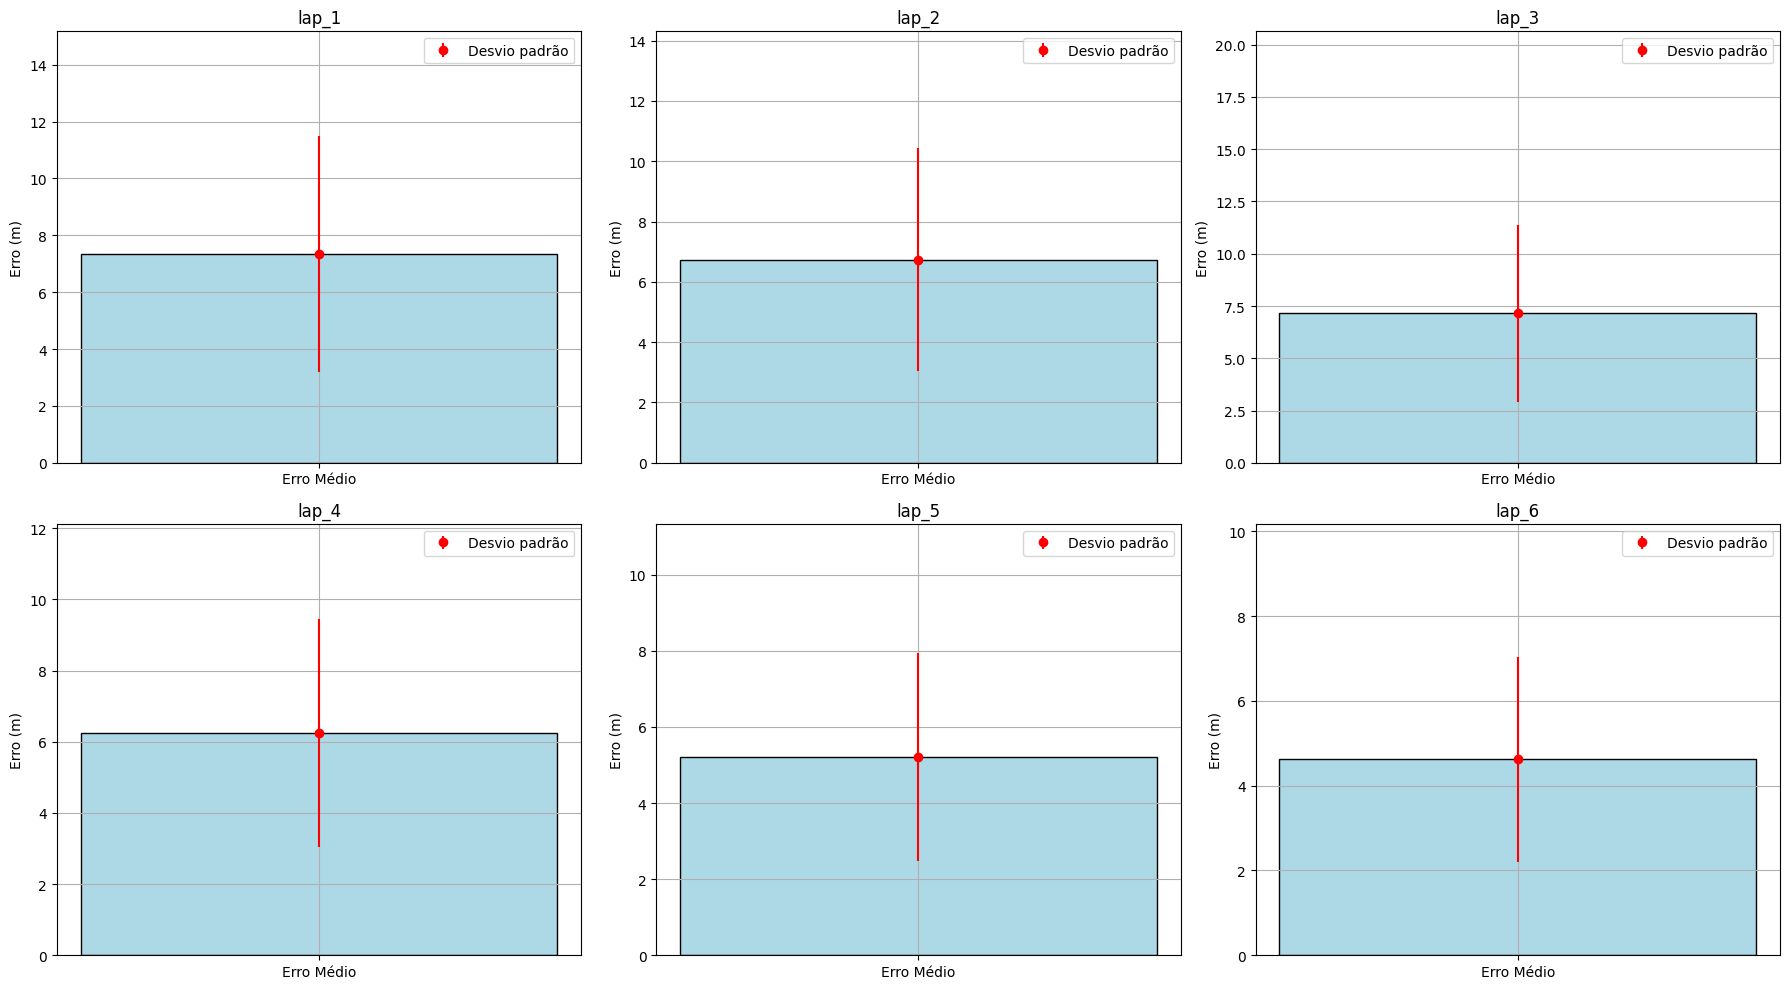

In [28]:
# Lista para extrair os erros médios e desvios diretamente do dicionário laps
laps_names = list(laps.keys())

# Plota
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, lap_name in enumerate(laps_names):
    # Acessa os resultados já calculados e armazenados no dicionário laps[lap_name]['erro_analysis']
    media_erro = laps[lap_name]['erro_analysis']['media_erro_m']
    desvio_erro = laps[lap_name]['erro_analysis']['desvio_erro_m']
    max_erro = laps[lap_name]['erro_analysis']['max_erro_m']
    min_erro = laps[lap_name]['erro_analysis']['min_erro_m']

    # Cria uma barra para o erro médio
    axs[i].bar(['Erro Médio'], [media_erro], color='lightblue', edgecolor='black')

    # Adiciona a barra de erro representando o desvio padrão
    axs[i].errorbar('Erro Médio', media_erro, yerr=desvio_erro, fmt='o', color='red', label='Desvio padrão')

    # Ajusta o limite superior do gráfico para dar espaço ao erro máximo
    axs[i].set_ylim(0, max_erro + 1)
    axs[i].set_title(f"{lap_name}")
    axs[i].set_ylabel("Erro (m)")

    # Adiciona a legenda e a grade
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### Erro Mínima Distância + Ângulo

Esse erro parece mais correto pois se eu tiver um deslocamento do meu circulo e ele fizer a intersecção na referência, a intersecção será o menor valor. O correto seria tentar pelo grau que aquele ponto se encontra baseado no seu ponto central que forma o circulo para os dados

In [26]:
def calcular_angulo(ponto, centro):
    delta_x = ponto[1] - centro[1]  # longitude
    delta_y = ponto[0] - centro[0]  # latitude
    angulo_rad = np.arctan2(delta_y, delta_x)
    angulo_deg = np.degrees(angulo_rad) % 360
    return angulo_deg

# Dicionário para guardar os resultados
resultados_erro_angulo = {}

# Ref: pontos de referência do pivô
ref = df_pivot.copy()
centro = (pivot_lat, pivot_long)

# Calcula ângulo dos pontos de referência (uma vez só)
ref['angulo'] = ref.apply(lambda row: calcular_angulo((row['latitude'], row['longitude']), centro), axis=1)

for lap_name in laps.keys():
    lap = laps[lap_name]['data_esp']

    erros_metros = []

    for _, ponto_lap in lap.iterrows():
        ponto_ensaio = (ponto_lap['latitude'], ponto_lap['longitude'])
        angulo_ensaio = calcular_angulo(ponto_ensaio, centro)

        # Acha o ponto de referência com ângulo mais próximo
        ref_idx = (ref['angulo'] - angulo_ensaio).abs().idxmin()
        ponto_ref = (ref.loc[ref_idx, 'latitude'], ref.loc[ref_idx, 'longitude'])

        # Calcula a distância
        erro = geodesic(ponto_ensaio, ponto_ref).meters
        erros_metros.append(erro)

    # Estatísticas
    media_erro = np.mean(erros_metros)
    desvio_erro = np.std(erros_metros)
    max_erro = np.max(erros_metros)
    min_erro = np.min(erros_metros)

    resultados_erro_angulo[lap_name] = {
        'media_erro_m': media_erro,
        'desvio_erro_m': desvio_erro,
        'max_erro_m': max_erro,
        'min_erro_m': min_erro,
        'qtd_pontos': len(erros_metros)
    }

# Mostra o resumo
for lap, res in resultados_erro_angulo.items():
    print(f"\n{lap}:")
    print(f"  ➔ Erro médio (por ângulo): {res['media_erro_m']:.2f} m")
    print(f"  ➔ Desvio padrão: {res['desvio_erro_m']:.2f} m")
    print(f"  ➔ Erro máximo: {res['max_erro_m']:.2f} m")
    print(f"  ➔ Erro mínimo: {res['min_erro_m']:.2f} m")
    print(f"  ➔ Quantidade de pontos: {res['qtd_pontos']}")


lap_1:
  ➔ Erro médio (por ângulo): 7.33 m
  ➔ Desvio padrão: 4.15 m
  ➔ Erro máximo: 14.18 m
  ➔ Erro mínimo: 0.05 m
  ➔ Quantidade de pontos: 778

lap_2:
  ➔ Erro médio (por ângulo): 6.74 m
  ➔ Desvio padrão: 3.69 m
  ➔ Erro máximo: 13.31 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 767

lap_3:
  ➔ Erro médio (por ângulo): 7.14 m
  ➔ Desvio padrão: 4.22 m
  ➔ Erro máximo: 19.64 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 819

lap_4:
  ➔ Erro médio (por ângulo): 6.25 m
  ➔ Desvio padrão: 3.21 m
  ➔ Erro máximo: 11.12 m
  ➔ Erro mínimo: 0.03 m
  ➔ Quantidade de pontos: 817

lap_5:
  ➔ Erro médio (por ângulo): 5.22 m
  ➔ Desvio padrão: 2.73 m
  ➔ Erro máximo: 10.34 m
  ➔ Erro mínimo: 0.02 m
  ➔ Quantidade de pontos: 819

lap_6:
  ➔ Erro médio (por ângulo): 4.62 m
  ➔ Desvio padrão: 2.41 m
  ➔ Erro máximo: 9.18 m
  ➔ Erro mínimo: 0.03 m
  ➔ Quantidade de pontos: 650


## Celular

In [34]:
df_celular = pd.read_excel("Dados/celular_volta_2.xlsx")
df_celular

,volta 4,04/23/2025 15:49:15.000 GMT-03:00,"POINT Z (-47,628639033 -22,713400617 542,300)",-22713400617,-47628639033,229980751,7485813336,542.3,0,0.1,1,0.2,-1,3.79,2.5,0.3,0.4,0.5,26,21
0,volta 4,04/23/2025 15:49:20.000 GMT-03:00,"POINT Z (-47,628639333 -22,713399817 543,100)",-22713399817,-47628639333,229980719.0,7.485813e+09,543.1,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,29,23
1,volta 4,04/23/2025 15:49:25.000 GMT-03:00,"POINT Z (-47,628639050 -22,713400100 543,400)",-227134001,-4762863905,229980748.0,7.485813e+09,543.4,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,30,24
2,volta 4,04/23/2025 15:49:30.000 GMT-03:00,"POINT Z (-47,628639250 -22,713399983 543,500)",-22713399983,-4762863925,229980727.0,7.485813e+09,543.5,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,31,24
3,volta 4,04/23/2025 15:49:35.000 GMT-03:00,"POINT Z (-47,628638933 -22,713400583 543,400)",-22713400583,-47628638933,229980761.0,7.485813e+06,543.4,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,30,24
4,volta 4,04/23/2025 15:49:40.000 GMT-03:00,"POINT Z (-47,628638717 -22,713400500 543,400)",-227134005,-47628638717,229980783.0,7.485813e+06,543.4,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,30,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,volta 4,04/23/2025 17:01:55.000 GMT-03:00,"POINT Z (-47,628634133 -22,713472800 545,000)",-227134728,-47628634133,229981396.0,7.485805e+09,545.0,0,0,1,0.772,328.4,3.79,2.5,0,0,0,30,25
872,volta 4,04/23/2025 17:02:00.000 GMT-03:00,"POINT Z (-47,628645533 -22,713441117 545,600)",-22713441117,-47628645533,229980162.0,7.485809e+09,545.6,0,0,1,0.720,329.2,3.79,2.5,0,0,0,29,25
873,volta 4,04/23/2025 17:02:05.000 GMT-03:00,"POINT Z (-47,628642033 -22,713404833 546,100)",-22713404833,-47628642033,229980451.0,7.485813e+09,546.1,0,0,1,0.772,358.6,3.79,2.5,0,0,0,30,24
874,volta 4,04/23/2025 17:02:10.000 GMT-03:00,"POINT Z (-47,628633383 -22,713388983 546,100)",-22713388983,-47628633383,229981309.0,7.485815e+09,546.1,0,0,1,0.000,-1.0,3.79,2.5,0,0,0,29,25


## Garmin

In [ ]:
df = pd.read_excel("Dados/garmin_volta_2.xlsx", )
df

ValueError: Worksheet index 0 is invalid, 0 worksheets found

# Comparação 3 Dispositivos